In [1]:
#-----------------------------------------Using alternative url becauuse the standard way isnt working
from six.moves import urllib
from sklearn.datasets import fetch_mldata

from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}

In [2]:
X, y = mnist["data"],mnist["target"]

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math

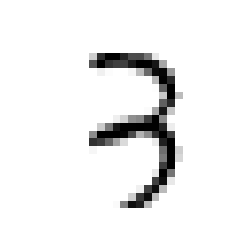

The corrseponding label for the image is  3.0


In [4]:
#lets see some random digit
random_digit = X[23000]
#random_digit.shape--------------> (784,1) = (28 * 28 ,1)
random_digit_image = random_digit.reshape(28,28)
plt.imshow(random_digit_image, cmap = matplotlib.cm.binary)#------>not using cmap returns a colored image.
plt.axis("off")
plt.show()
print("The corrseponding label for the image is ", y[23000])

In [5]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [6]:
#shuffle the training data features and labels together. By default, the numbers are not shuffled in MNIST
import numpy as np
shuffled_indices = np.random.permutation(60000)#-------shuffles the numbers from 1 to 60k
X_train, y_train = X_train[shuffled_indices],y_train[shuffled_indices]

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)#---------------------------->train
predictions = random_forest.predict(X_test)#------------------->predict
confusion_mtx = confusion_matrix(y_test,predictions)
print(confusion_mtx)

/home/being-aerys/.local/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[ 961    0    3    0    0    4    7    1    3    1]
 [   0 1118    3    4    0    1    4    1    4    0]
 [  10    3  989    2    5    2    5    7    8    1]
 [   5    2   12  954    0   14    0    9   10    4]
 [   1    0    7    0  940    1    4    5    2   22]
 [   5    2    5   30    4  826    5    2    7    6]
 [   9    3    3    2    9    7  920    1    3    1]
 [   2    6   20    5    4    0    0  974    3   14]
 [  11    0   14   26    8   13    8    4  884    6]
 [   8    3    4   12   24    6    2   12    9  929]]


In [8]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predictions)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
#write a function to use the 3 things calculated above to plot the precision recall curve


precision: [0.94960474 0.98328936 0.93301887 0.92173913 0.94567404 0.94508009
 0.96335079 0.95866142 0.94748124 0.94410569]
recall: [0.98061224 0.98502203 0.95833333 0.94455446 0.95723014 0.92600897
 0.96033403 0.94747082 0.90759754 0.92071358]
fscore: [0.96485944 0.98415493 0.94550669 0.93300733 0.951417   0.93544734
 0.96184004 0.95303327 0.92711064 0.93226292]
support: [ 980 1135 1032 1010  982  892  958 1028  974 1009]


In [18]:
#To look at precision-recall curve, let us convert our MNIST multi-class dataset into a binary dataset that 
#only has label either hotdog or not-hotdog ;D (Jian Yang Effect)
y_train_for_9 = (y_train == 9)#directly converts those which do not satisfy to False
y_test_for_9 = (y_test == 9)


10000


In [38]:
#cross_val_score returns score of test fold where cross_val_predict returns predicted y values for the test fold.
#VVI: Every time you want to do k-fold CrossValidation, create stratified training folds first.
#StratifiedKFold is a variation of KFold that returns stratified folds. 
#The folds are made by preserving the percentage of samples for each class.

from sklearn.model_selection import StratifiedKFold #not StratifiedShuffledSplit
from sklearn.base import clone
# from sklearn.linear_model import SGDClassifier

# sgd_classifier = SGDClassifier(random_state = 42)
#note: Remember that you are using kFold validation only for comparing different classifiers
#you average the scores from different folds to get the performance of a classifier
#leave test data alone, use training data for k fold validation in general

In [39]:
stratified_folds = StratifiedKFold(n_splits = 3, random_state = 42)
#calculate the accuracy for each classifier clone for the fold it is working on using stratified k folds rather
#than directly performing k fold
for training_index_of_fold, testing_index_of_fold in stratified_folds.split(X_train, y_train_for_9):
    
    clone_of_classifier_for_this_fold = clone(random_forest)
    
    X_traing_for_this_fold = X_train[training_index_of_fold]
    y_train_for_this_fold = y_train_for_9[training_index_of_fold]
    X_test_for_this_fold = X_train[testing_index_of_fold]
    y_test_for_this_fold = y_train_for_9[testing_index_of_fold]
    
    clone_of_classifier_for_this_fold.fit(X_traing_for_this_fold, y_train_for_this_fold)
    y_predictions_for_this_fold = clone_of_classifier_for_this_fold.predict(X_test_for_this_fold)
    total_accurate_for_this_fold = sum( y_predictions_for_this_fold == y_test_for_this_fold)
    print(total_accurate_for_this_fold/ len(y_predictions_for_this_fold))

0.9761
0.97715
0.9752


In [40]:
#However, cross_val_score() method does the same thing above by default i.e., creates stratified flods from the
#training data and calculates cross-validation accuracy for each fold
#However, accuracy is not the only metric you care about for the reasons that you already know.
#Instead you might want to look at precision, recall, etc.
#FOr that you have cross_val_predict which instead of returning the same accuracy as above returns raw predictions
#for each training data k fold

#VVI: Note that since a sample appears only once on the test set, only one prediction is returned
#for a sample during k fold

from sklearn.model_selection import cross_val_score
cross_val_score_ = cross_val_score(random_forest, X_train,y_train_for_9,cv = 3, scoring = "accuracy")
print(cross_val_score_) #for some reason, returns slightly different values than above but is essentially doing
#the same thing

[0.97615 0.97815 0.9761 ]


In [41]:
from sklearn.model_selection import cross_val_predict
y_train_9_prediction = cross_val_predict(random_forest, X_train, y_train_for_9, cv = 3)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_for_9,y_train_9_prediction))

[[53929   122]
 [ 1250  4699]]


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision, Recall, F1 Score: ",precision_score(y_train_for_9,y_train_9_prediction),
                                        recall_score(y_train_for_9,y_train_9_prediction),
                                         f1_score(y_train_for_9,y_train_9_prediction))

Precision, Recall, F1 Score:  0.974694046878241 0.7898806522104556 0.8726090993500464


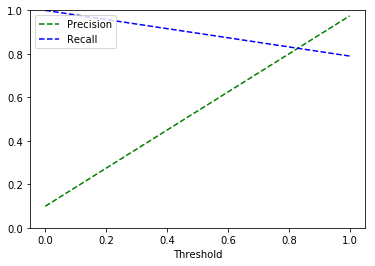

In [43]:
#TO draw a precision-recall graph acccording to different thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_for_9, y_train_9_prediction)

#However, you need to plot the precision-recall curve by defining a function yourself
def plot_precision_recall_acc_to_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"g--",label = "Precision")
    plt.plot(thresholds, recalls[:-1],"b--",label = "Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

plot_precision_recall_acc_to_threshold(precisions,recalls,thresholds)
plt.show()